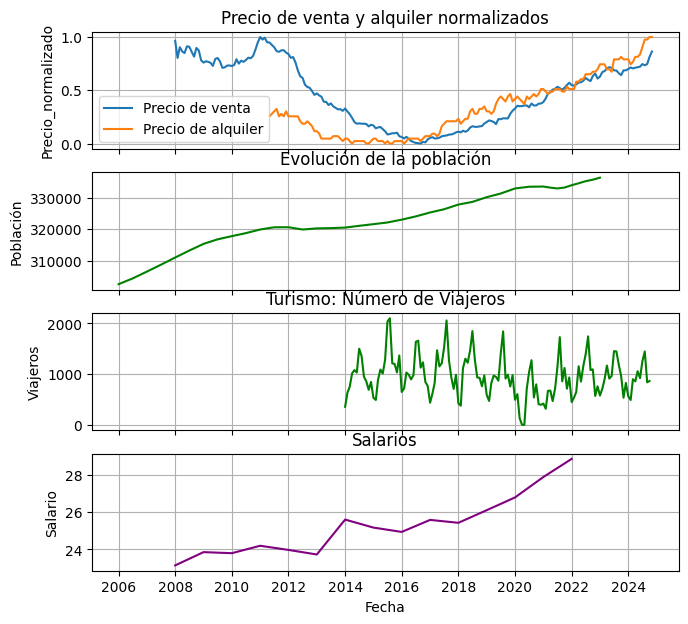

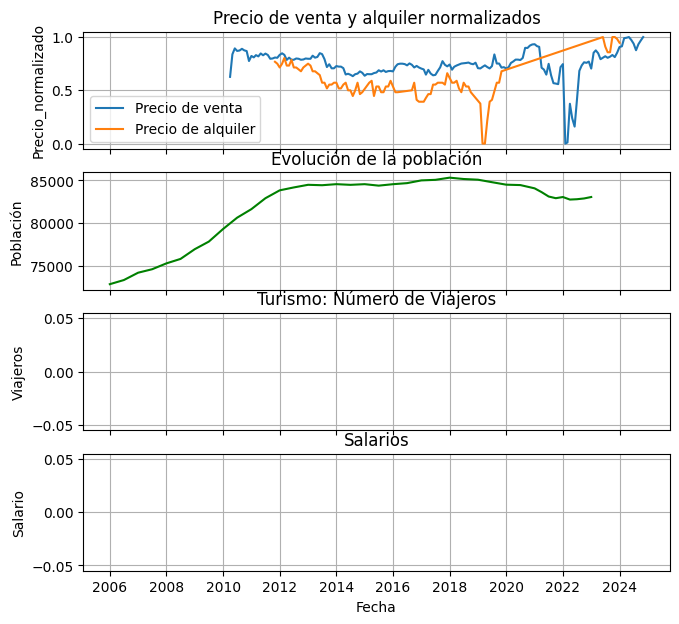

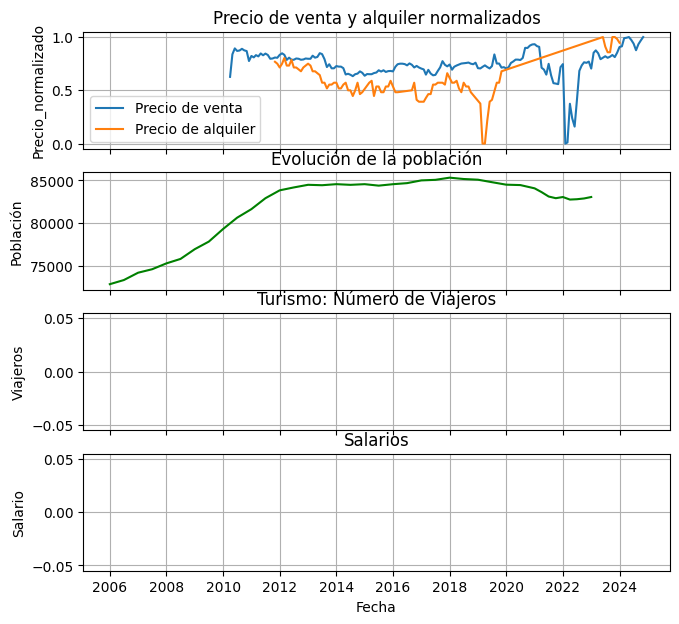

In [2]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns



df = pd.read_csv("csv_idealista_venta_corregido.csv", sep=";" ,header=0, index_col=0)
df2 = pd.read_csv("csv_idealista_alquiler_corregido.csv", sep=";" ,header=0, index_col=0)
turismo = pd.read_csv("csv_turismo_corregido.csv", sep=";" ,header=0, index_col=0)
salarios = pd.read_csv("csv_salarios_corregido.csv", sep=";" ,header=0, index_col=0)
poblacion = pd.read_csv("csv_poblacion_corregido.csv", sep=";" ,header=0, index_col=0)

df['Fecha'] = pd.to_datetime(df['Fecha'])
df2['Fecha'] = pd.to_datetime(df2['Fecha'])
turismo['Fecha'] = pd.to_datetime(turismo['Fecha'])
salarios['Fecha'] = pd.to_datetime(salarios['Fecha'])
poblacion['Fecha'] = pd.to_datetime(poblacion['Fecha'])
# Función para actualizar el gráfico
def actualizar_graficos():
    agrupado_por = agrupador_selector.get()
    filtro = lista_desplegable.get()
    tipo_precio = tipo_precio_selector.get()

    # Filtrar datos
    if agrupado_por == "Comunidad":
        datos_ventas = df[df["Comunidad"] == filtro]
        datos_alquileres = df2[df2["Comunidad"] == filtro]
        datos_turismo = turismo[turismo["Comunidad"] == filtro]
        datos_salarios = salarios[salarios["Comunidad"] == filtro]
        datos_poblacion = poblacion[poblacion["Comunidad"] == filtro]
    elif agrupado_por == "Provincia":
        datos_ventas = df[df["Provincia"] == filtro]
        datos_alquileres = df2[df2["Provincia"] == filtro]
        datos_turismo = turismo[turismo["Provincia"] == filtro]
        datos_salarios = salarios[salarios["Provincia"] == filtro]
        datos_poblacion = poblacion[poblacion["Provincia"] == filtro]
    else:
        datos_ventas = df
        datos_alquileres = df2
        datos_turismo = turismo
        datos_salarios = salarios

    # Crear el gráfico
    fig, axs = plt.subplots(4, 1, figsize=(6, 12), sharex=True)

    if tipo_precio == "Precio de ventas":
        sns.lineplot(data = datos_ventas, x = "Fecha", y = "Precio_€/m2", ax = axs[0], label = "Precio de venta", errorbar= None)
        #ax.plot(datos_ventas["Fecha"], datos_ventas["Precio_normalizado"], label="Ventas", marker="o", color="blue")
        axs[0].set_title("Precio de venta")
        axs[0].grid(True)
    if tipo_precio == "Precio de alquileres":
        sns.lineplot(data = datos_alquileres, x = "Fecha", y = "Precio_€/m2", ax = axs[0], label = "Precio de alquiler", errorbar= None)
        axs[0].set_title("Precio del alquiler")
        axs[0].grid(True)
    if tipo_precio =="Ambos":
        sns.lineplot(data = datos_ventas, x = "Fecha", y = "Precio_normalizado", ax = axs[0], label = "Precio de venta", errorbar= None)
        sns.lineplot(data = datos_alquileres, x = "Fecha", y = "Precio_normalizado", ax = axs[0], label = "Precio de alquiler", errorbar= None)
        axs[0].set_title("Precio de venta y alquiler normalizados")
        axs[0].grid(True)
    
    # Gráfico de poblacion
    sns.lineplot(data=datos_poblacion, x="Fecha", y="Poblacion", ax=axs[1], color="green")
    
    axs[1].set_title("Evolución de la población")
    axs[1].set_ylabel("Población")
    axs[1].grid(True)
    
    # Gráfico de turismo
    sns.lineplot(data=datos_turismo, x="Fecha", y="Viajeros", ax=axs[2], color="green")
    
    axs[2].set_title("Turismo: Número de Viajeros")
    axs[2].set_ylabel("Viajeros")
    axs[2].grid(True)

    # Gráfico de salarios
    sns.lineplot(data=datos_salarios, x="Fecha", y="Salario", ax=axs[3], color="purple")
    axs[3].set_title("Salarios")
    axs[3].set_xlabel("Fecha")
    axs[3].set_ylabel("Salario")
    axs[3].grid(True) 
    

    # Mostrar el gráfico en el canvas
    for widget in grafico_frame.winfo_children():
        widget.destroy()
    canvas = FigureCanvasTkAgg(fig, grafico_frame)
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
    canvas.draw()

# Crear la ventana principal
ventana = tk.Tk()
ventana.title("Evolución de precios, turismo y salarios en España")
ventana.geometry("900x700")

# Marco para los gráficos
grafico_frame = tk.Frame(ventana)
grafico_frame.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

# Marco para los controles
control_frame = tk.Frame(ventana)
control_frame.pack(side=tk.RIGHT, fill=tk.Y)

# Título del selector de agrupación
titulo_selector = tk.Label(control_frame, text="Seleccionar por", font=("Arial", 12))
titulo_selector.pack(pady=(20, 5))

# Selector de agrupación
agrupador_selector = ttk.Combobox(control_frame, values=["Comunidad", "Provincia"], state="readonly")
agrupador_selector.set("Comunidad")
agrupador_selector.pack(pady=10)

# Lista desplegable para Comunidad/Provincia
lista_desplegable = ttk.Combobox(control_frame, state="readonly")
lista_desplegable.pack(pady=10)

# Función para actualizar las opciones de la lista desplegable
def actualizar_lista(event):
    agrupado_por = agrupador_selector.get()
    opciones = sorted(df[agrupado_por].unique().tolist())
    lista_desplegable["values"] = opciones
    if opciones:
        lista_desplegable.set(opciones[0])

agrupador_selector.bind("<<ComboboxSelected>>", actualizar_lista)
actualizar_lista(None)  # Inicializar la lista desplegable

# Selector del tipo de precio
tipo_precio_label = tk.Label(control_frame, text="Tipo de precio", font=("Arial", 12))
tipo_precio_label.pack(pady=(20, 5))

tipo_precio_selector = ttk.Combobox(
    control_frame,
    values=["Precio de ventas", "Precio de alquileres", "Ambos"],
    state="readonly",
)
tipo_precio_selector.set("Precio de ventas")
tipo_precio_selector.pack(pady=10)

# Botón para actualizar los gráficos
boton_buscar = tk.Button(control_frame, text="Buscar", command=actualizar_graficos)
boton_buscar.pack(pady=20)

# Ejecutar la aplicación
ventana.mainloop()

In [ ]:
#sns.scatterplot(data=turismo, x="Fecha", y="Viajeros", color="blue", s=100, label="Datos")

# Línea que une los puntos
sns.lineplot(data=turismo[turismo["Provincia"] == "Madrid"], x="Fecha", y="Viajeros", color="blue", label="Línea de datos")

# Línea de tendencia
sns.regplot(data=turismo[turismo["Provincia"] == "Madrid"], x=turismo[turismo["Provincia"] == "Madrid"]["Fecha"].map(pd.Timestamp.toordinal), y="Viajeros", scatter=False, color="red", label="Tendencia")

# Personalización
plt.title("Scatterplot con líneas y línea de tendencia")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
fig = plt.figure(figsize = (5,3))
sns.lineplot(data=df, x = "Fecha", y = "Precio_€/m2")
#ax.plot(datos_filtrados["Fecha"], datos_filtrados["Precio_€/m2"], marker='o', label=filtro)
plt.title(f"Evolución del precio de la vivienda")
plt.xlabel("Fecha")
plt.ylabel("Precio_€/m2")
plt.legend()